<a href="https://colab.research.google.com/github/CarrotKM/Telco_Churn-Binary-Model/blob/main/Karan_%E2%80%9CBatman%E2%80%9D_Mohindroo_Telco_Assignment_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.55;background-color: #E94B3C"><b>Telco Customer Churn Classification</b><br></h1>

<center>
    <img src="https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391" alt="Telco Customer Churn" width="50%">
</center>

### **Problem Statement:**

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

### **Objectives:**
- To classify the potential churn customers based on numerical and categorical features.
- Develop a **binary classification** model.
- Implement strategies to handle class imbalance (if it will improve model performance)
- Analyze the impact of hyperparameters on model performance.
- Incorporate preprocessing and feature engineering techniques to enhance model performance.



### **Expected Notebook Contents:**
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering (and Selection if possible)
- Imbalance Handling
- Modeling and Hyper-Parameter Tuning.
- Experiment tracking with Mlflow.
- Conclusion



### Lets get started!


### **Dataset Attributes**
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

## **Load the Dataset**

**To begin with, we will mount our drive.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Ensure that you place a shortcut to the datasets folder in your drive.**

In [2]:
import os
os.chdir("/content/drive/MyDrive/Pierrepont/Datascience3/datasets/")

Now let's proceed to load the datasets of interest

Import the Necessary Libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('Telco_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA




### Missing Data Handeling

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
print(f'Duplicates:{data.duplicated().sum()}')
print(f'Missing Values:{data.isnull().sum().sum()}')

Duplicates:0
Missing Values:0
Empty Strings":0


In [20]:
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**TotalCharges needs to be converted from categorical to numerical**


---



In [17]:
df = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [18]:
df.isnull().sum()

11

In [19]:
non_numeric_indices = pd.to_numeric(data['TotalCharges'], errors='coerce').isna()
non_numeric_values = data['TotalCharges'][non_numeric_indices].tolist()
print(non_numeric_values)

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [31]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isnull().sum()

11

## Numerical Features

In [32]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


### 'tenure' amd 'MonthlyCharges'

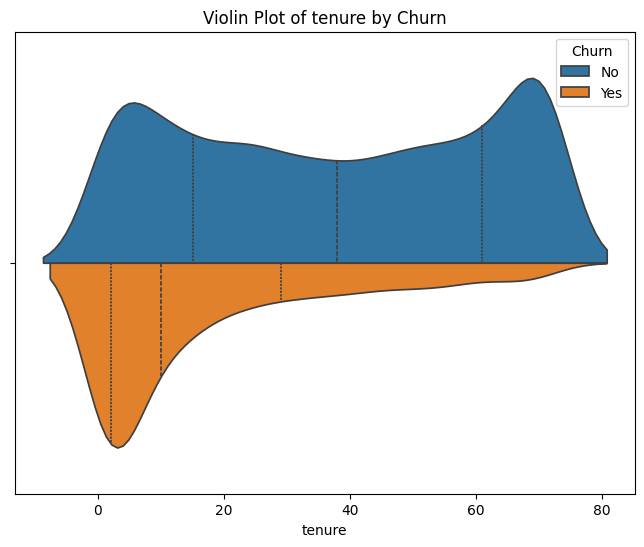

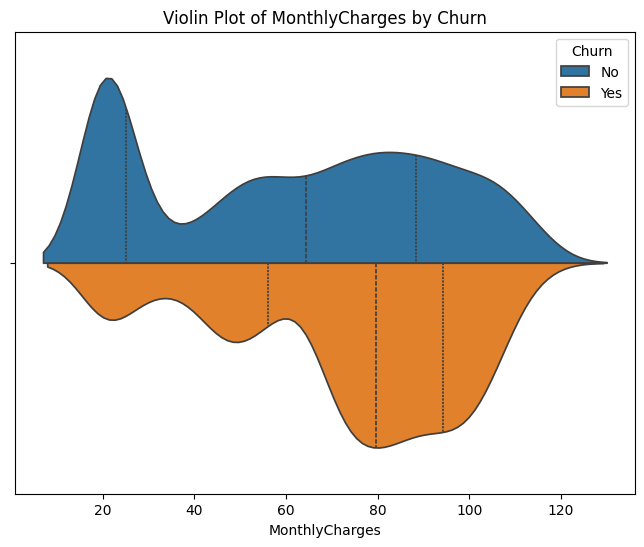

In [62]:
numerical_features = ['tenure', 'MonthlyCharges']
for col in numerical_features:
  if col != 'TotalCharges':
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=col, data=data, hue='Churn', split=True, inner='quart')
    plt.title(f'Violin Plot of {col} by Churn')
    plt.xlabel(col)
    plt.show()



*   Imbalenced: apply SMOTE for both
*   Churn deacreases drasticly as tenure passes 20 months
*   Churn is greatest between 80 and 100 dollars monthly and least surrounding 20 dollars monthly





### 'TotalCharges':

**Dealing with missing values in TotalCharges**

---


In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])

In [41]:
data['TotalCharges'].describe()

,TotalCharges
count,7043.00
mean,2283.30
std,2265.00
min,18.80
25%,402.23
50%,1400.55
75%,3786.60
max,8684.80


In [53]:
print(data['TotalCharges'].isnull().sum())
print(data[non_numeric_indices]['Churn'])

0
488     No
753     No
936     No
1082    No
1340    No
3331    No
3826    No
4380    No
5218    No
6670    No
6754    No
Name: Churn, dtype: object


For some reason KKNImputer will always assign the mean value in the missing indicies regardless of what n_neighbors is set to.

Distribution check:

<Axes: xlabel='TotalCharges'>

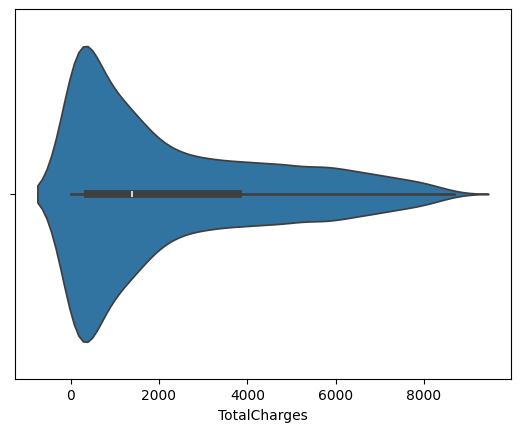

In [49]:
from seaborn import violinplot

violinplot(x=data['TotalCharges'])

<Axes: xlabel='TotalCharges'>

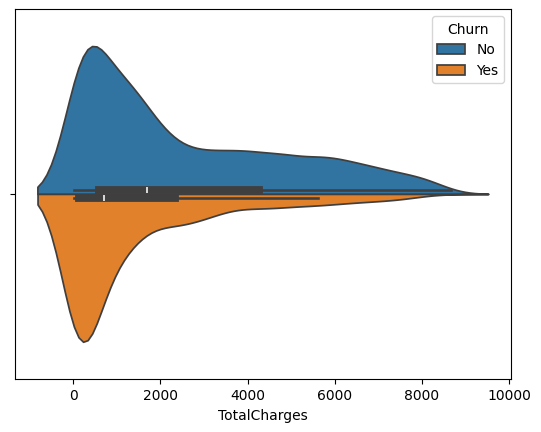

In [51]:
violinplot(x=data['TotalCharges'], hue=data['Churn'], split=True)



*   Data imbalanced, apply SMOTE
*   LOWER total charges corrolate to increased Churn

### 'SeniorCitizen':

<Axes: xlabel='SeniorCitizen', ylabel='Count'>

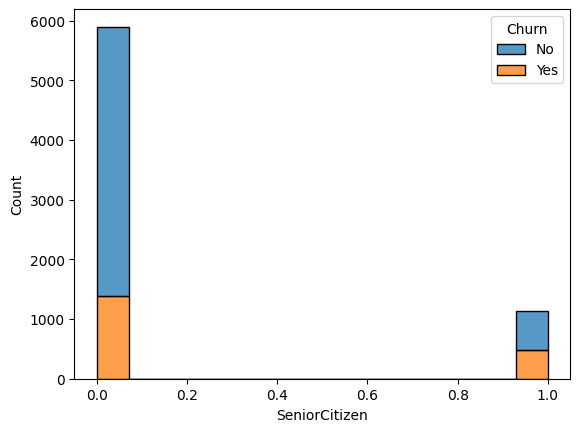

In [65]:
from seaborn import histplot

histplot(x=data['SeniorCitizen'], hue=data['Churn'], multiple='stack')

In [64]:
for i in data['SeniorCitizen'].unique():
  print(i)

0
1


## Categorical Data

In [56]:
for column in data.select_dtypes(include=['object']).drop(['customerID'], axis=1).columns:
    print(f"Unique values in {column}: {data[column].unique()}")

Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Churn: ['No' 'Yes']


### Create Feature 'Internet Service'